In [46]:
from diagrams import Diagram, Cluster, Edge
from diagrams.aws.compute import EC2, LambdaFunction
from diagrams.aws.ml import Sagemaker
from diagrams.aws.storage import S3
from diagrams.aws.database import Dynamodb
from diagrams.aws.network import ClientVpn
from diagrams.aws.management import Cloudwatch
from diagrams.aws.mobile import Amplify
from diagrams.aws.general import User
from diagrams.onprem.client import User as OnPremUser
from diagrams.custom import Custom  # For AWS Bedrock node

graph_attr = {
    "fontsize": "25",
    "bgcolor": "white",
    "pad": "1.0",
    "nodesep": "0.5",
    "ranksep": "2.0",
    "size": "12,12!",
    "dpi": "200"
}

# Define node and edge attributes
node_attr = {
    "fontsize": "12",          # Font size for nodes
    "fontname": "Arial Bold",  # Font style for nodes
}

edge_attr = {
    "fontsize": "12",          # Font size for edges
    "fontname": "Arial Bold",  # Font style for edges
}

with Diagram(
    "Smart Vision System Architecture",
    show=False,
    graph_attr=graph_attr,
    node_attr=node_attr,
    edge_attr=edge_attr
):
    # On-Premises Camera Server
    camera = OnPremUser("Camera Server\n(Conveyor Belt)")

    # AWS VPC Cluster with custom graph attributes
    with Cluster(
        "AWS VPC",
        graph_attr={
            "fontsize": "20",
            "fontname": "Arial Bold"
        }
    ):
        # VPN Connection
        vpn = ClientVpn("VPN Gateway")

        # Backend Services Cluster
        with Cluster(
            "Backend Services",
            graph_attr={
                "fontsize": "14",
                "fontname": "Arial Bold"
            }
        ):
            # FastAPI Backend on EC2
            ec2 = EC2("EC2 Instance\nFastAPI Backend")

            # DeepSort on EC2
            deepsort = LambdaFunction("DeepSort\n(Object Tracking)")

        # ML Models Cluster
        with Cluster(
            "ML Models",
            graph_attr={
                "fontsize": "14",
                "fontname": "Arial Bold"
            }
        ):
            sagemaker_detection = Sagemaker("YOLOv11\nObject Detection")
            sagemaker_classification = Sagemaker("MobileNetV2\nClassification-Freshness")
            # AWS Bedrock Node (using Custom node)
            bedrock_icon = "image.png"  # Provide the path to your AWS Bedrock icon
            bedrock_vlm = Custom(
                "AWS Bedrock\nLlama3.2-11bVision\nOCR-Entity Extraction",
                bedrock_icon
            )

        # Storage and Database Cluster
        with Cluster(
            "Data Storage",
            graph_attr={
                "fontsize": "14",
                "fontname": "Arial Bold"
            }
        ):
            s3 = S3("S3 Bucket\nImage Storage")
            dynamodb = Dynamodb("DynamoDB\nLogs & Entities")

        # Monitoring
        cloudwatch = Cloudwatch("CloudWatch\nMonitoring")

    # Amplify Frontend (moved outside the AWS VPC cluster)
    amplify = Amplify("AWS Amplify\n(ReactJS Frontend)")

    # Operator User
    user = User("Operator")

    # Connections
    camera >> Edge(label="Streams Video", style="dashed") >> vpn
    vpn >> Edge(label="Secure Connection", style="dashed") >> ec2
    ec2 >> Edge(label="Processes Video") >> deepsort

    # DeepSort interactions
    deepsort >> Edge(label="Invokes") >> sagemaker_detection
    deepsort >> Edge(label="Invokes") >> sagemaker_classification
    deepsort >> Edge(label="Invokes") >> bedrock_vlm
    deepsort >> Edge(label="Stores Images") >> s3
    deepsort >> Edge(label="Stores Data") >> dynamodb

    # EC2 Backend interactions
    ec2 >> Edge(label="Logs Metrics") >> cloudwatch

    # Amplify connects to VPN to access EC2 endpoints
    amplify >> Edge(label="Secure Connection", style="dashed") >> vpn

    # Amplify displays to user
    amplify >> Edge(label="Displays Video & Data") >> user


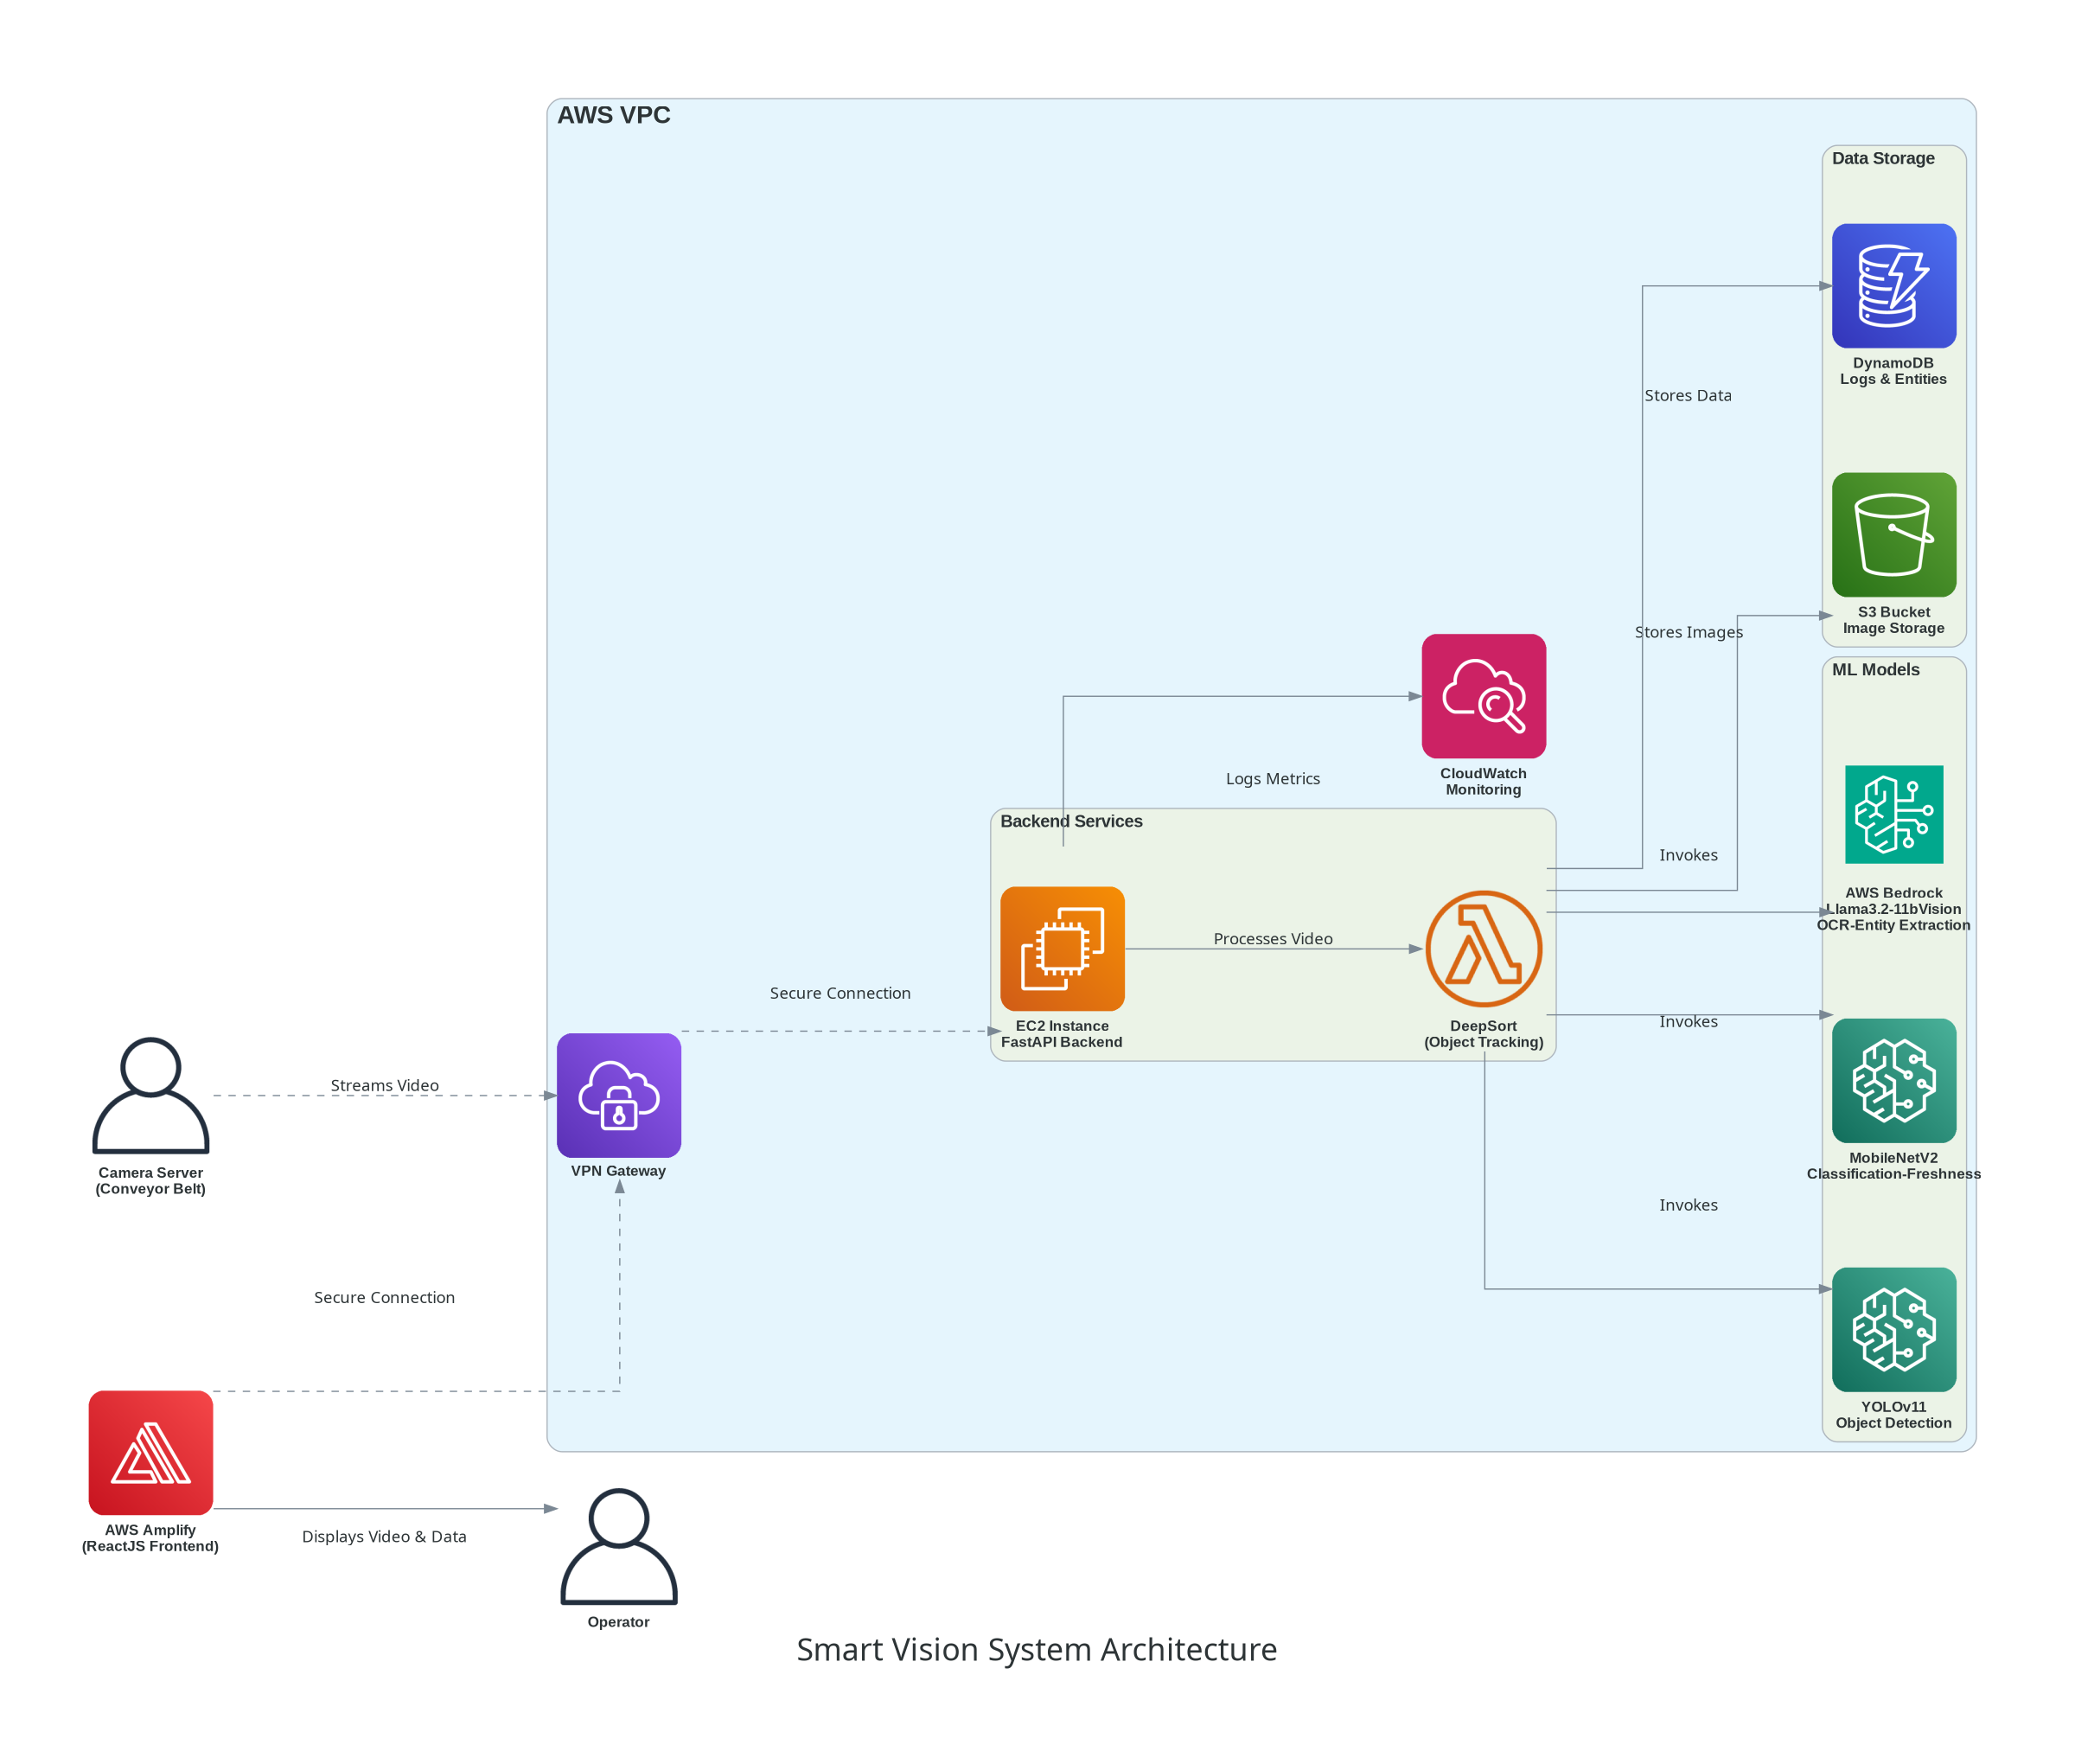

In [47]:
from IPython.display import Image, display

image_path = 'smart_vision_system_architecture.png'
display(Image(filename=image_path))


---